In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition, multiplicative_decomposition

from luwiji.time_series import illustration

# Error-Trend-Seasonal (ETS) Smoothing method

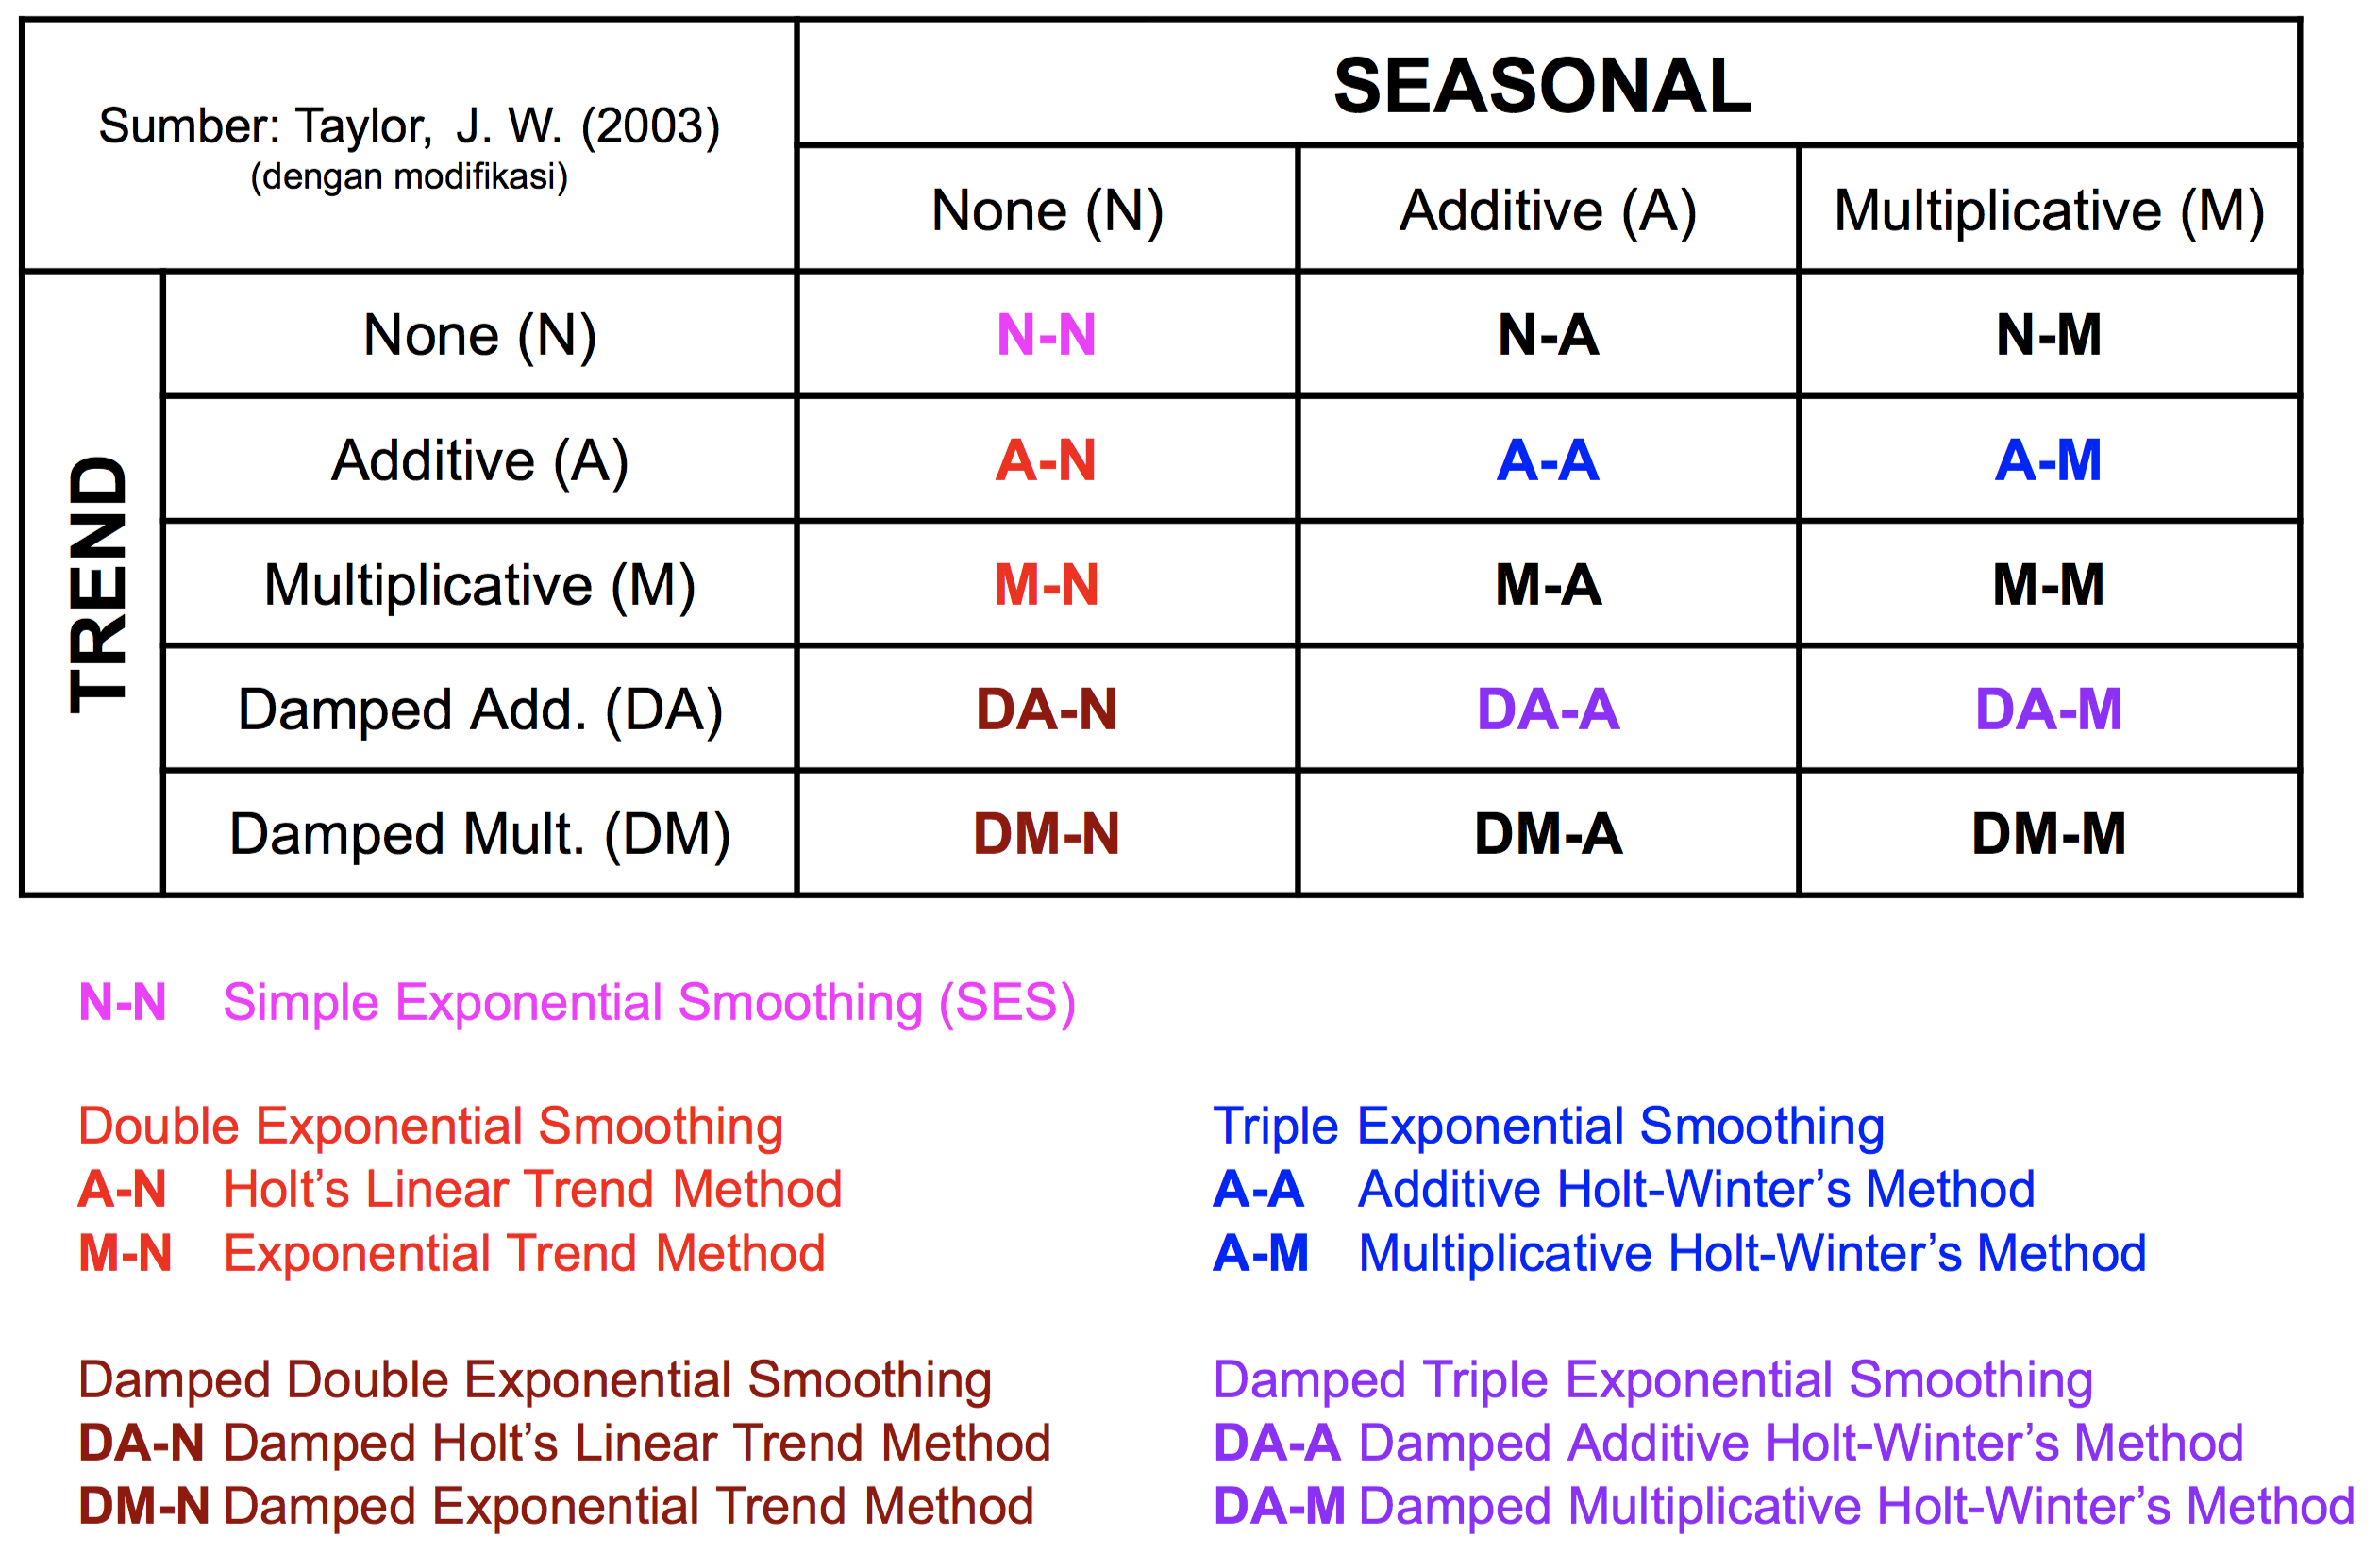

In [2]:
illustration.ets_model

# Exercise 1: Cheese Production Data

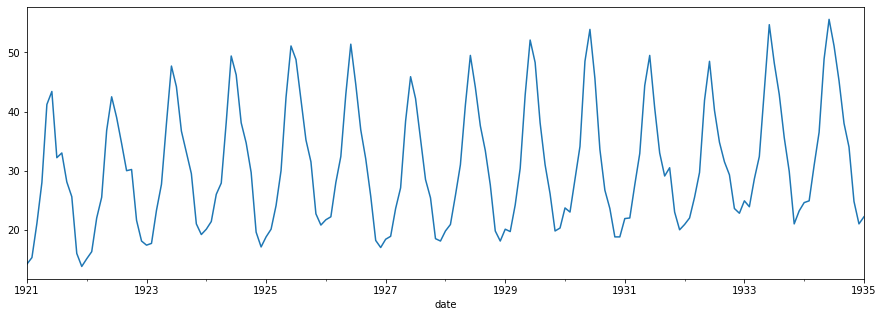

In [3]:
df = pd.read_csv("data/cheese_fred.csv", index_col='date', parse_dates=["date"])
series = df.total_cheese_production
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

### Training

In [6]:
es = ExponentialSmoothing(X_train,seasonal='add',seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True,)

/home/yulius/miniconda3/envs/jcop_ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Forecast 

In [9]:
pred = model.predict(len(X_train)-10,len(X_train)+50)

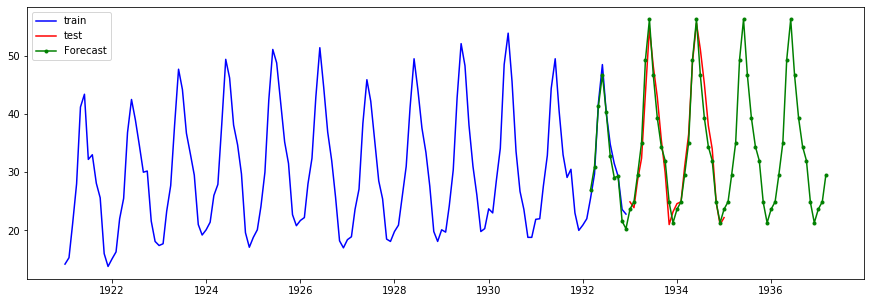

In [10]:
plt.figure(figsize=(15,5))
plt.plot(X_train,'b-', label ="train")
plt.plot(X_test,'r-', label ="test")
plt.plot(pred,'g.-', label ="Forecast")
plt.legend()

# Exercise 2: Airline Passanger Data

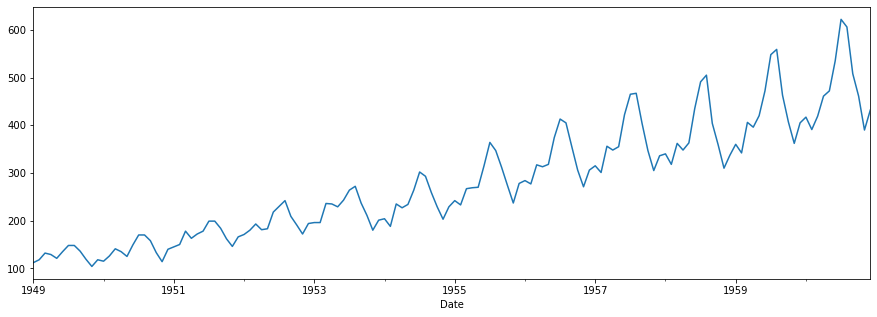

In [12]:
df = pd.read_csv("data/airline.csv", index_col='Date', parse_dates=["Date"])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

### Training

In [13]:
es = ExponentialSmoothing(X_train,trend='add',seasonal='mul',seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True,)

/home/yulius/miniconda3/envs/jcop_ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Forecast 

In [14]:
pred = model.predict(len(X_train)-10,len(X_train)+50)

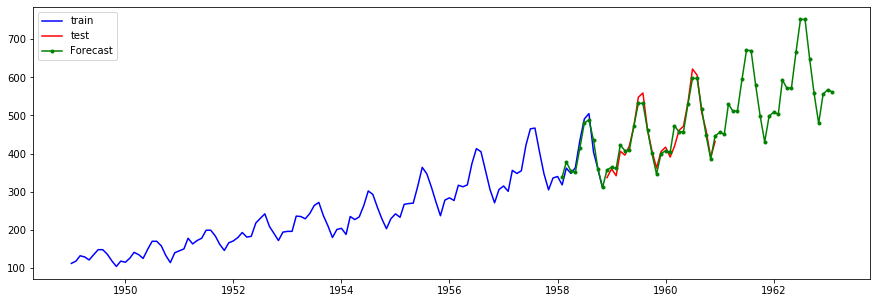

In [15]:
plt.figure(figsize=(15,5))
plt.plot(X_train,'b-', label ="train")
plt.plot(X_test,'r-', label ="test")
plt.plot(pred,'g.-', label ="Forecast")
plt.legend()

# Exercise 3: Crhistmas

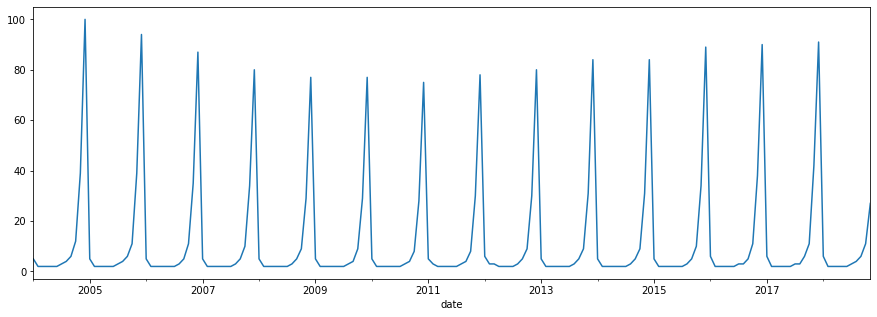

In [62]:
df = pd.read_csv("data/christmas.csv", index_col='date', parse_dates=["date"])
series = df.interest
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

### Training

In [63]:
es = ExponentialSmoothing(X_train,seasonal='add',seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True,)

/home/yulius/miniconda3/envs/jcop_ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Forecast 

In [64]:
pred = model.predict(len(X_train)-10,len(X_train)+50)

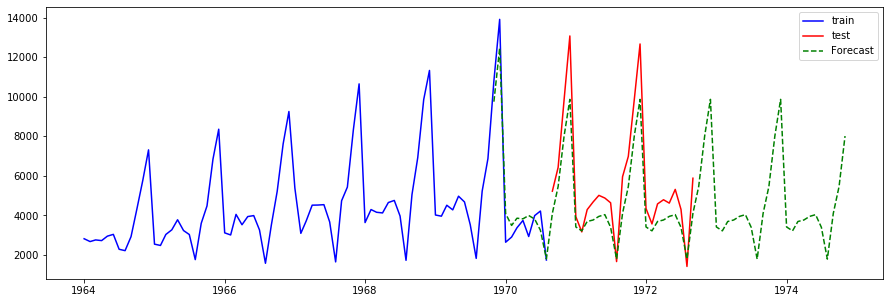

In [74]:
plt.figure(figsize=(15,5))
plt.plot(X_train,'b-', label ="train")
plt.plot(X_test,'r-', label ="test")
plt.plot(pred,'g--', label ="Forecast")
plt.legend()

# Exercise 4: Champagne Sales

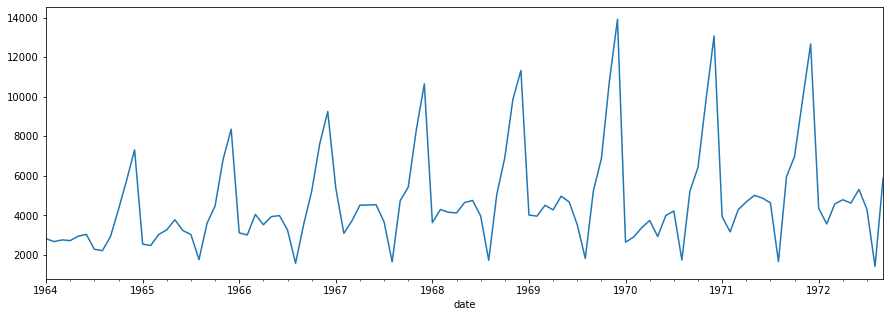

In [69]:
df = pd.read_csv("data/perrin_freres_champagne.csv", index_col='date', parse_dates=["date"])
series = df.sales
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

### Training

In [70]:
es = ExponentialSmoothing(X_train,seasonal='mul',seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True,)

/home/yulius/miniconda3/envs/jcop_ts/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Forecast 

In [71]:
pred = model.predict(len(X_train)-10,len(X_train)+50)

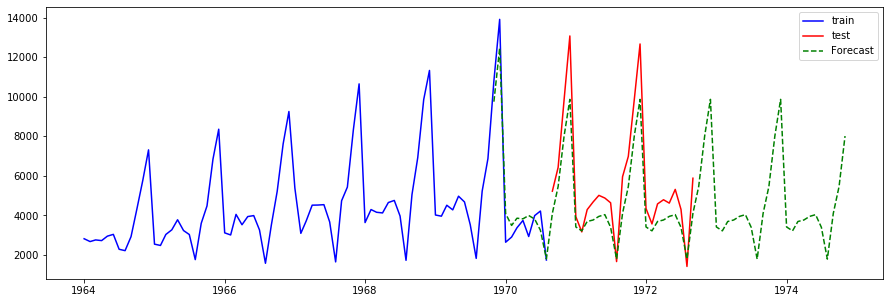

In [73]:
plt.figure(figsize=(15,5))
plt.plot(X_train,'b-', label ="train")
plt.plot(X_test,'r-', label ="test")
plt.plot(pred,'g--', label ="Forecast")
plt.legend()

# Auto ETS

In [75]:
from jcopml.time_series import  auto_ets

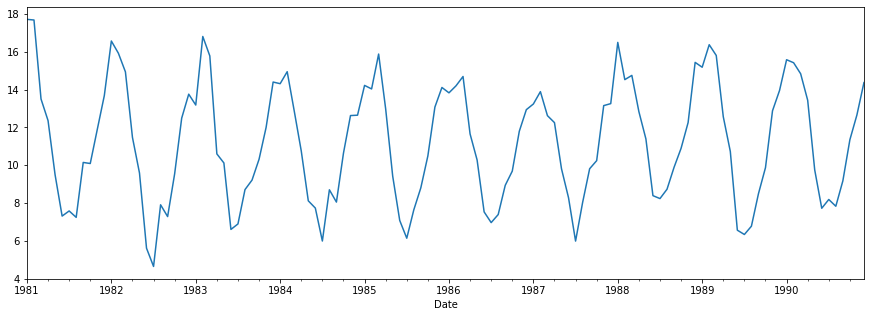

In [79]:
df = pd.read_csv("data/daily_min_temp.csv", index_col='Date', parse_dates=["Date"])
df = df.resample('m').mean()
series = df.Temp
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

In [80]:
model, cv_result = auto_ets(X_train,scoring='mse')

In [81]:
cv_result.head()

,trend,seasonal,damped,boxcox,mse_0,mse_1,mse_2,mse_3,mean_mse
20,mul,mul,False,False,2.626338,1.316793,0.650963,1.755076,1.587293
3,None,add,False,False,2.359033,1.136664,1.105961,1.960276,1.640483
18,mul,mul,True,False,2.612098,1.985289,0.771672,1.557321,1.731595
16,mul,add,False,False,3.118712,1.407030,0.632319,1.873301,1.757841
2,None,add,False,True,3.054488,1.112930,1.081966,1.862337,1.777931


### Forecast 

In [82]:
pred = model.predict(len(X_train)-10,len(X_train)+50)

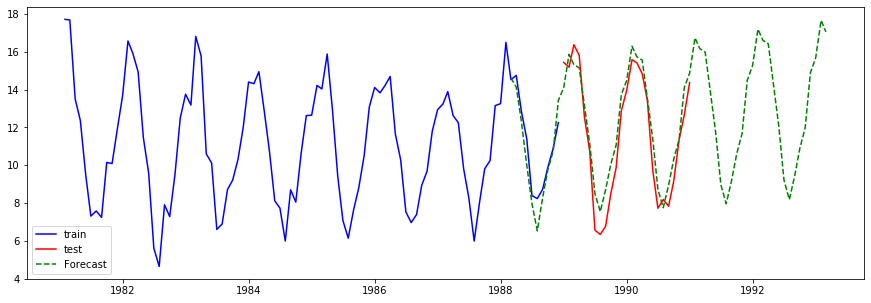

In [83]:
plt.figure(figsize=(15,5))
plt.plot(X_train,'b-', label ="train")
plt.plot(X_test,'r-', label ="test")
plt.plot(pred,'g--', label ="Forecast")
plt.legend()